# Prática de Ciência de Dados
* Aplicarei todos os conhecimentos adquirido na Formação Cientista de Dados (http://encurtador.com.br/aVX68)
 * Analisarei o DataSet German Credit Risk do Kaggle (http://encurtador.com.br/mGS17)

In [1]:
# Importando as biblioteca
import pandas as pd 
import seaborn as srn 
import statistics as sts 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# base de dados
df = pd.read_csv('credit.csv')
df.shape

(1000, 10)

In [9]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [4]:
# removendo a coluna Unnamed: 0
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [5]:
#
group = df.groupby(['Sex']).size()
group

Sex
female    310
male      690
dtype: int64

<AxesSubplot:ylabel='Sex'>

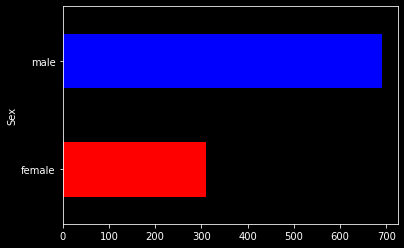

In [6]:
#
group.plot.barh(color=['red','blue'])

In [7]:
#
dfGroup = df.groupby('Job')['Credit amount'].mean()
dfGroup

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

<AxesSubplot:xlabel='Job'>

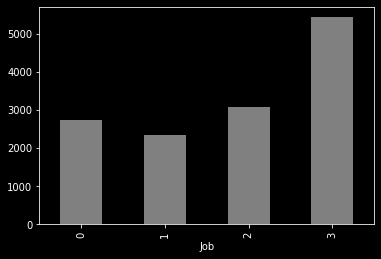

In [8]:
dfGroup.plot.bar(color = 'gray')

In [10]:
#
X = df.iloc[:, 7].values
y = df.iloc[:, 0].values
X

array([ 6, 48, 12, 42, 24, 36, 24, 36, 12, 30, 12, 48, 12, 24, 15, 24, 24,
       30, 24, 24,  9,  6, 10, 12, 10,  6,  6, 12,  7, 60, 18, 24, 18, 12,
       12, 45, 48, 18, 10,  9, 30, 12, 18, 30, 48, 11, 36,  6, 11, 12, 24,
       27, 12, 18, 36,  6, 12, 36, 18, 36,  9, 15, 36, 48, 24, 27, 12, 12,
       36, 36, 36,  7,  8, 42, 36, 12, 42, 11, 54, 30, 24, 15, 18, 24, 10,
       12, 18, 36, 18, 12, 12, 12, 12, 24, 12, 54, 12, 18, 36, 20, 24, 36,
        6,  9, 12, 24, 18, 12, 24, 14,  6, 15, 18, 36, 12, 48, 42, 10, 33,
       12, 21, 24, 12, 10, 18, 12, 12, 12, 12, 12, 48, 36, 15, 18, 60, 12,
       27, 12, 15, 12,  6, 36, 27, 18, 21, 48,  6, 12, 36, 18,  6, 10, 36,
       24, 24, 12,  9, 12, 24,  6, 24, 18, 15, 10, 36,  6, 18, 11, 24, 24,
       15, 12, 24,  8, 21, 30, 12,  6, 12, 21, 36, 36, 21, 24, 18, 15,  9,
       16, 12, 18, 24, 48, 27,  6, 45,  9,  6, 12, 24, 18,  9, 12, 27, 12,
       12, 30, 12, 12, 24, 12,  9, 36, 27, 30, 36,  6, 18, 36, 24, 10, 12,
       12, 12, 24, 15, 36

In [11]:
c = np.corrcoef(X, y)
c

array([[ 1.        , -0.03613637],
       [-0.03613637,  1.        ]])

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
X = X.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [14]:
modelo.intercept_

36.258554152603075

In [15]:
modelo.coef_

array([-0.03408861])

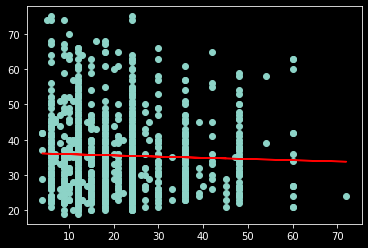

In [16]:
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

In [19]:
modelo.predict([[90]])

array([33.19057952])